# Controlling Plot Aesthetics

> A guide to various plot aesthetic changes that can be done.

- order: 8

 Since **v2024.03.29**, swarmplots are, by default, plotted asymmetrically to the right side. For detailed information, please refer to [Swarm Side](#changing-swarm-side).

 Since **v2025.03.27**, further aesthetic changes were added/updated which include:

 - [Raw bars](#raw-bars)
  
 - [Contrast bars](#contrast-bars)
  
 - [Reference Band](#reference-band)
  
 - [Delta text](#delta-text)
  
 - [Jitter](#adding-jitter-to-slopegraph-plots)
  
 - [Gridkey](#gridkey)
  
 - [Delta dots](#delta-dot)
  
 - [Effect size paired lines](#effect-size-paired-lines)
  
 - [Baseline error curve](#baseline-error-curve)

## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest
import seaborn as sns

print("We're using DABEST v{}".format(dabest.__version__))

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 50.42it/s]

Numba compilation complete!
We're using DABEST v2025.10.20


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore") # to suppress warnings related to points not being able to be plotted due to dot size

## Creating a demo dataset

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                   'Control 2' : c2,     'Test 2' : t2,
                   'Control 3' : c3,     'Test 3' : t3,
                   'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                   'Gender'    : gender, 'ID'  : id_col
                  })

np.random.seed(9999) # Fix the seed so the results are replicable.

# Create samples
N = 20
y = norm.rvs(loc=3, scale=0.4, size=N*4)
y[N:2*N] = y[N:2*N]+1
y[2*N:3*N] = y[2*N:3*N]-0.5

# Add a `Treatment` column
t1 = np.repeat('Placebo', N*2).tolist()
t2 = np.repeat('Drug', N*2).tolist()
treatment = t1 + t2 

# Add a `Rep` column as the first variable for the 2 replicates of experiments done
rep = []
for i in range(N*2):
    rep.append('Rep1')
    rep.append('Rep2')

# Add a `Genotype` column as the second variable
wt = np.repeat('W', N).tolist()
mt = np.repeat('M', N).tolist()
wt2 = np.repeat('W', N).tolist()
mt2 = np.repeat('M', N).tolist()

genotype = wt + mt + wt2 + mt2

# Add an `id` column for paired data plotting.
id = list(range(0, N*2))
id_col = id + id 

# Combine all columns into a DataFrame.
df_delta2 = pd.DataFrame({'ID'        : id_col,
                  'Rep'      : rep,
                   'Genotype'  : genotype, 
                   'Treatment': treatment,
                   'Y'         : y
                })

def create_demo_prop_dataset(seed=9999, N=40):
    import numpy as np
    import pandas as pd

    np.random.seed(9999)  # Fix the seed to ensure reproducibility of results.
    # Create samples
    n = 1
    c1 = np.random.binomial(n, 0.2, size=N)
    c2 = np.random.binomial(n, 0.2, size=N)
    c3 = np.random.binomial(n, 0.8, size=N)

    t1 = np.random.binomial(n, 0.6, size=N)
    t2 = np.random.binomial(n, 0.2, size=N)
    t3 = np.random.binomial(n, 0.3, size=N)
    t4 = np.random.binomial(n, 0.4, size=N)
    t5 = np.random.binomial(n, 0.5, size=N)
    t6 = np.random.binomial(n, 0.6, size=N)
    t7 = np.ones(N)
    t8 = np.zeros(N)
    t9 = np.zeros(N)

    # Add a `gender` column for coloring the data.
    females = np.repeat('Female', N / 2).tolist()
    males = np.repeat('Male', N / 2).tolist()
    gender = females + males

    # Add an `id` column for paired data plotting.
    id_col = pd.Series(range(1, N + 1))

    # Combine samples and gender into a DataFrame.
    df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                       'Control 2': c2, 'Test 2': t2,
                       'Control 3': c3, 'Test 3': t3,
                       'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                       'Test 7': t7, 'Test 8': t8, 'Test 9': t9,
                       'Gender': gender, 'ID': id_col
                       })

    return df
df_prop = create_demo_prop_dataset()


two_groups_prop_paired = dabest.load(df_prop, idx=("Control 1", "Test 1"), proportional=True, paired="baseline", id_col="ID")
two_groups_prop = dabest.load(df_prop, idx=("Control 1", "Test 1"), proportional=True)
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"))
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2")))
repeated_measures = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3"),paired="baseline", id_col="ID")
two_groups_paired = dabest.load(df, idx=("Control 1", "Test 1"), paired="baseline", id_col="ID")
mini_meta_paired = dabest.load(df, idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), mini_meta=True, id_col="ID", paired="baseline")
paired_delta2 = dabest.load(data = df_delta2, 
                                paired = "baseline", id_col="ID",
                                x = ["Treatment", "Rep"], y = "Y", 
                                delta2 = True, experiment = "Genotype")

## Changing the graph colours

### Color categories from another variable
Use the parameter `color_col` to specify which column in the dataframe will be used to create the different colours for your graph.

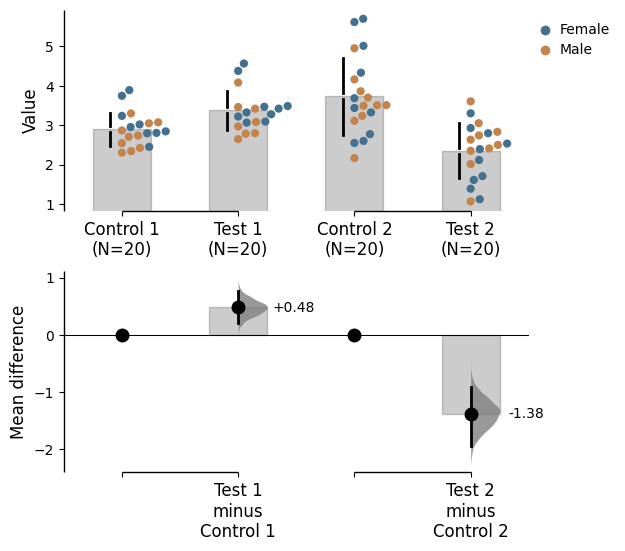

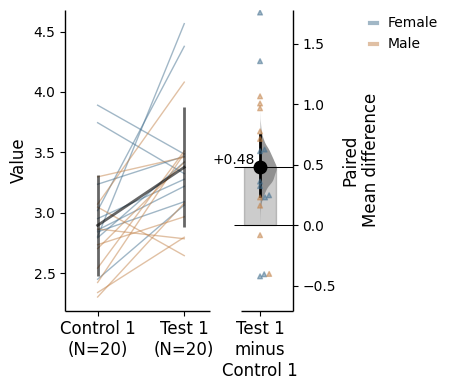

In [ ]:
multi_2group.mean_diff.plot(color_col="Gender");

two_groups_paired.mean_diff.plot(color_col="Gender");

### Custom palette
The colour palette for the graph can be changed using the parameter `custom_palette`. Multiple types of color palettes can be used:

- A list of colors (named colors, hex, rgb, etc) e.g. `['red', 'blue', 'green']`
  
- A seaborn color palette e.g. `'Set1'`
  
- A matplotlib color map e.g. `'viridis'`
  - `'paired'` is an interesting option for two-group (or multi two-group) comparisons
  
- A dictionary with the keys as the column names and the values as the colors e.g. `{'Control 1': 'red', 'Test 1': 'blue', 'Test 2': 'green'}`
  - Or, a dictionary with the keys as the binary options for proportion plots (barplots and sankey) and the values as the colors e.g. `{0: 'red', 1: 'blue'}`

#### A list of colors

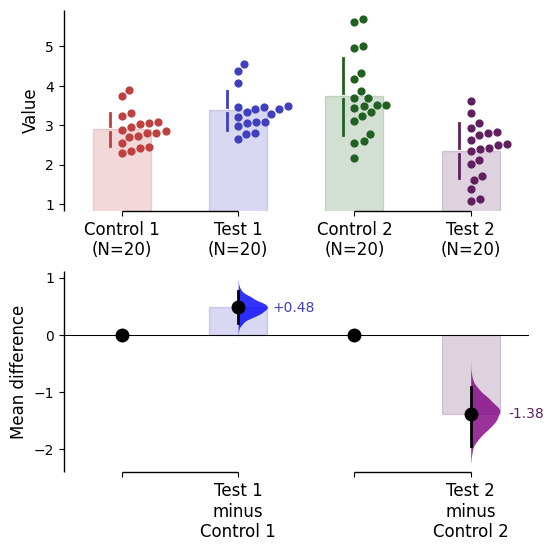

In [ ]:
multi_2group.mean_diff.plot(custom_palette=['red', 'blue', 'green', 'purple', 'orange', 'brown']);

#### Seaborn color palette

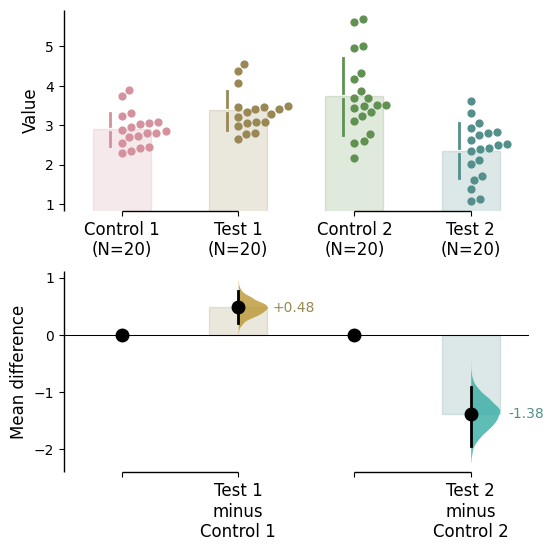

In [ ]:
multi_2group.mean_diff.plot(custom_palette=sns.color_palette("husl", 6));

#### Matplotlib color map/palette

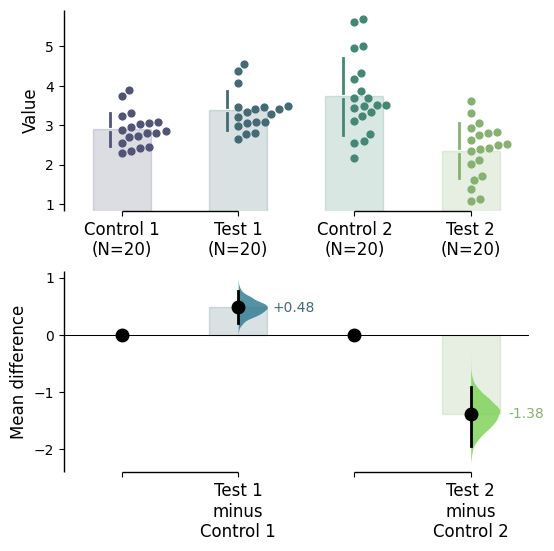

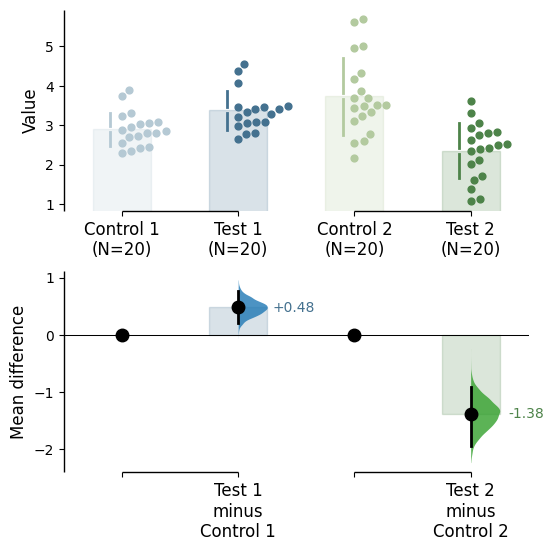

In [ ]:
multi_2group.mean_diff.plot(custom_palette="viridis");
multi_2group.mean_diff.plot(custom_palette="Paired");

#### A user-defined dictionary

There are [many ways](https://matplotlib.org/users/colors.html) to specify matplotlib colours. Find one example below using accepted colour names, hex strings (commonly used on the web), and RGB tuples.

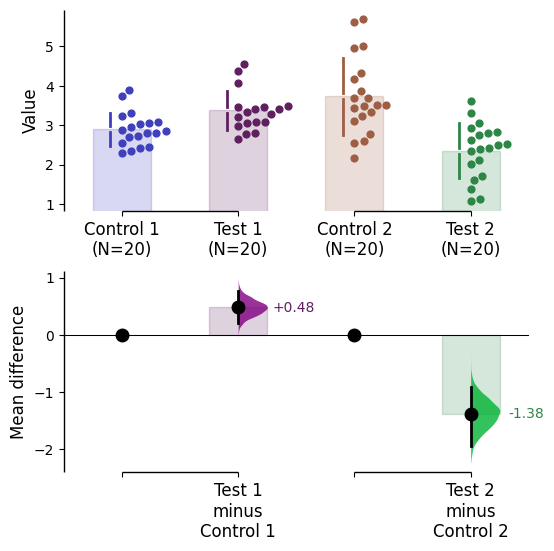

In [ ]:
my_color_palette = {"Control 1" : "blue",
                        "Test 1"    : "purple",
                        "Control 2" : "#cb4b16",     # This is a hex string.
                        "Test 2"    : (0., 0.7, 0.2) # This is a RGB tuple.
                       }

multi_2group.mean_diff.plot(custom_palette=my_color_palette);

For proportion plots (barplots and sankey), a color palette dict can also be supplied via `{1: first_color, 0, second_color}` where first_color and second_color are valid matplotlib colours.

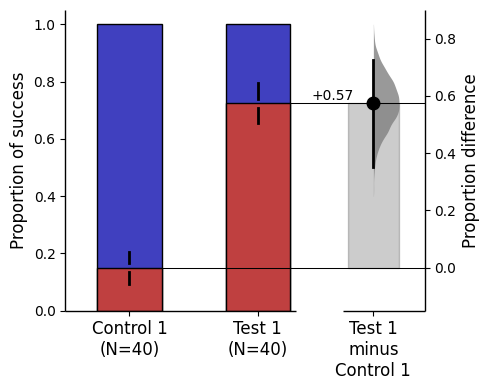

In [ ]:
two_groups_prop.mean_diff.plot(custom_palette={1: "red", 0: "blue"});

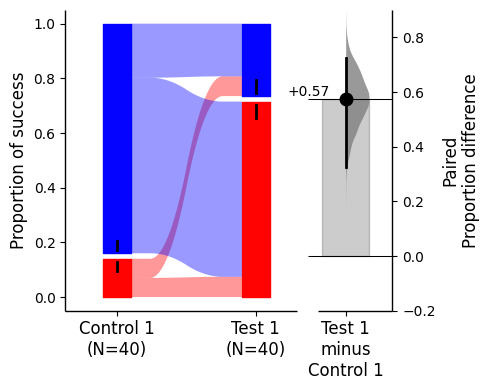

In [ ]:
two_groups_prop_paired.mean_diff.plot(custom_palette={1: "red", 0: "blue"});

#### Color palette changes also now affect the effect size curve colors in paired plots

Note: The first color in the custom palette is used for the control group. As in the example below, if `show_baseline_ec` is set to `False`, it wont be represented in the plot.

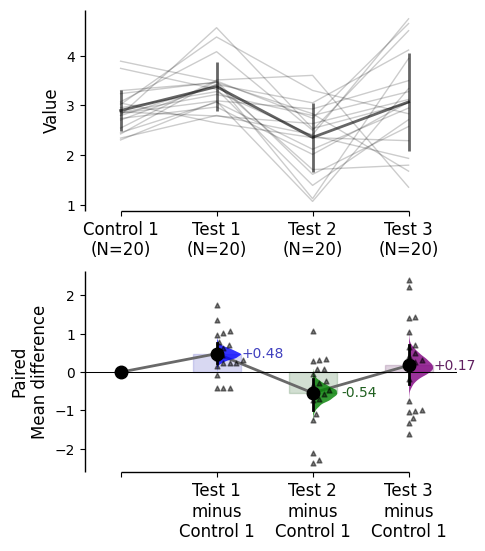

In [ ]:
repeated_measures.mean_diff.plot(custom_palette=["red", "blue", "green", "purple"]);

## Color saturation

By default, ``dabest.plot()`` [desaturates](https://en.wikipedia.org/wiki/Colorfulness#Saturation)
the colour of the dots in the swarmplot by 50%. This draws attention to the effect size bootstrap curves.

You can alter the default values with the parameters ``raw_desat`` and ``contrast_desat``.


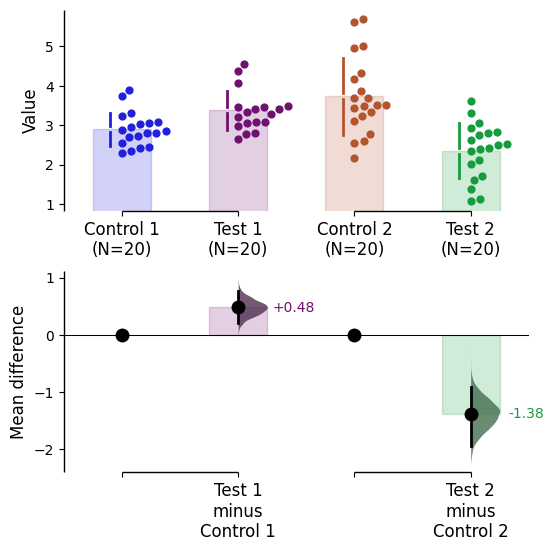

In [ ]:
multi_2group.mean_diff.plot(custom_palette=my_color_palette,
                                raw_desat=0.75,
                                contrast_desat=0.25);

## Alpha (transparency)
It is possible change the transparency of the raw data by using the `raw_alpha` parameter. This can also be achieved by adding
`alpha` to the relevant rawdata kwargs (`barplot_kwargs`, or `swarmplot_kwargs`, or `slopegraph_kwargs`, or `sankey_kwargs`)

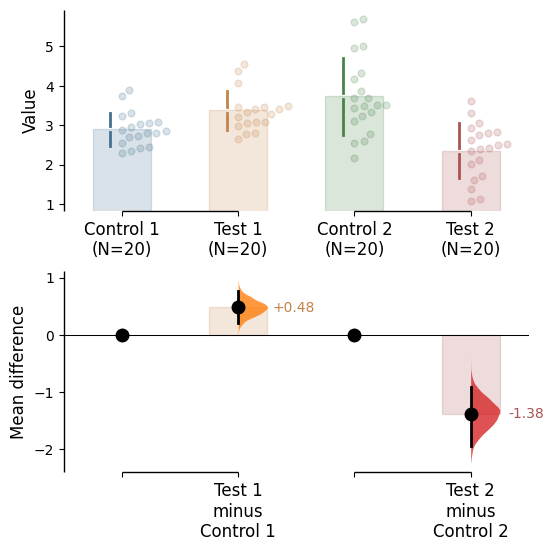

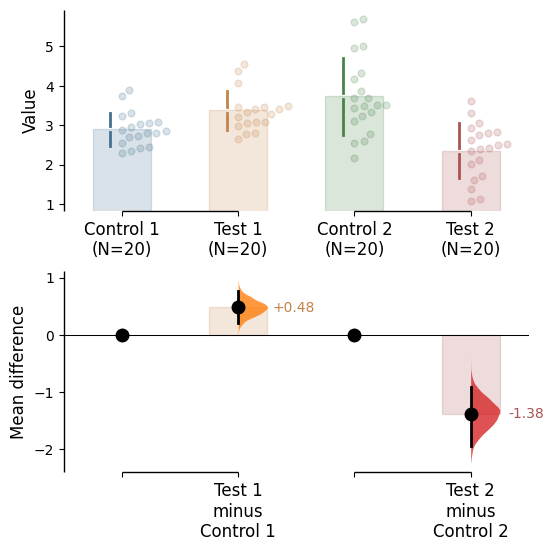

In [ ]:
multi_2group.mean_diff.plot(raw_alpha=0.2);

multi_2group.mean_diff.plot(swarmplot_kwargs={'alpha': 0.2});

It is also possible change the transparency of the effect size curves by using the `contrast_alpha` parameter. This can also be 
achieved via adding `alpha` to the `contrast_kwargs` parameter.

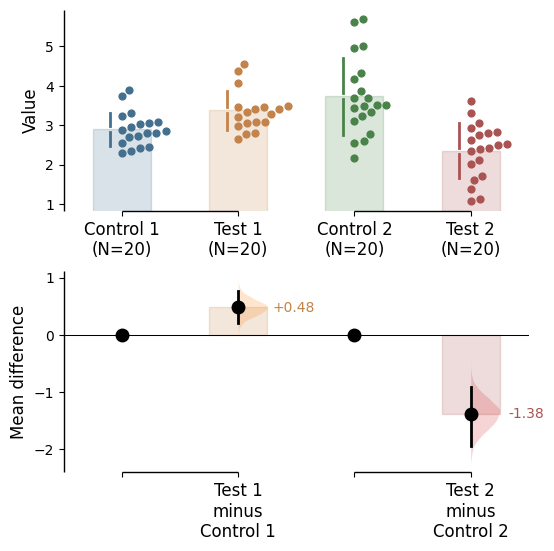

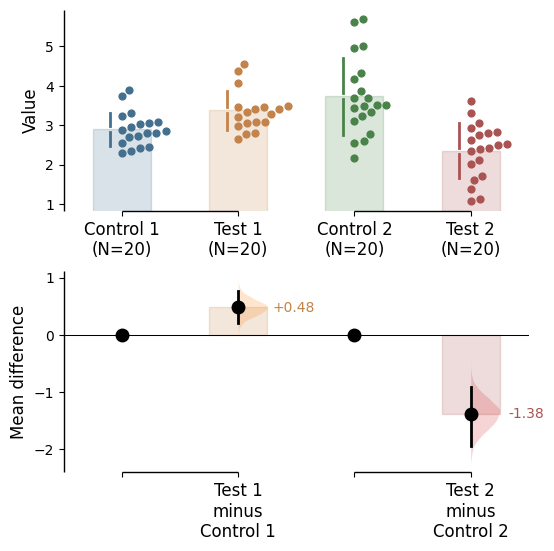

In [ ]:
multi_2group.mean_diff.plot(contrast_alpha=0.2);

multi_2group.mean_diff.plot(contrast_kwargs={'alpha':0.2});

## Marker size
It is possible change the size of the dots used in the rawdata swarmplot, as well as those to indicate the effect sizes, by using the parameters `raw_marker_size` and `contrast_marker_size` respectively.


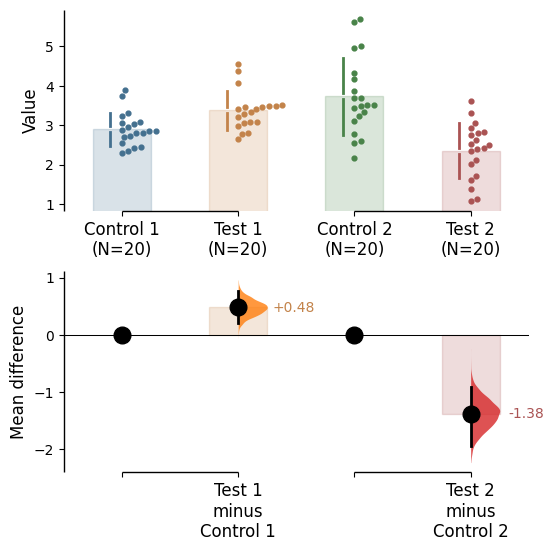

In [ ]:
multi_2group.mean_diff.plot(raw_marker_size=3,
                                contrast_marker_size=12);

## Axes

### Lims

To change the y-limits for the rawdata axes, and the contrast axes, use the parameters `raw_ylim` and `contrast_ylim`.

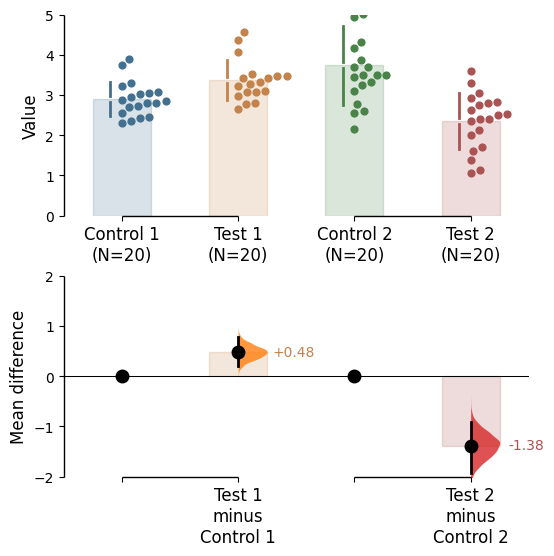

In [ ]:
multi_2group.mean_diff.plot(raw_ylim=(0, 5),
                                contrast_ylim=(-2, 2));

If the effect size is qualitatively inverted (ie. a smaller value is a
better outcome), you can simply invert the tuple passed to
``contrast_ylim``.

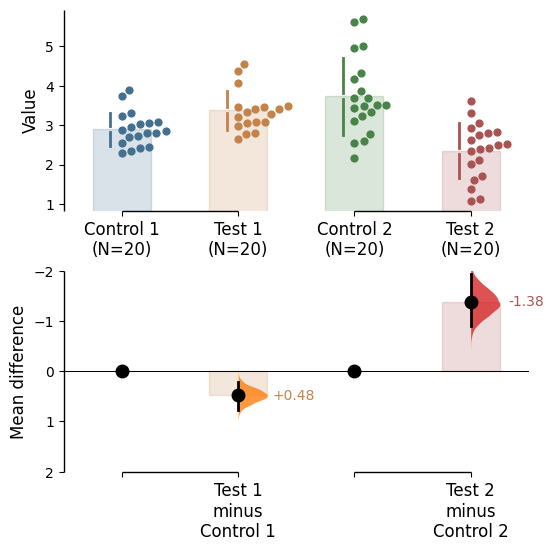

In [ ]:
multi_2group.mean_diff.plot(contrast_ylim=(2, -2));

The contrast axes share the same y-limits as those of the delta-delta plot. Thus, the y axis of the delta-delta plot changes as well.

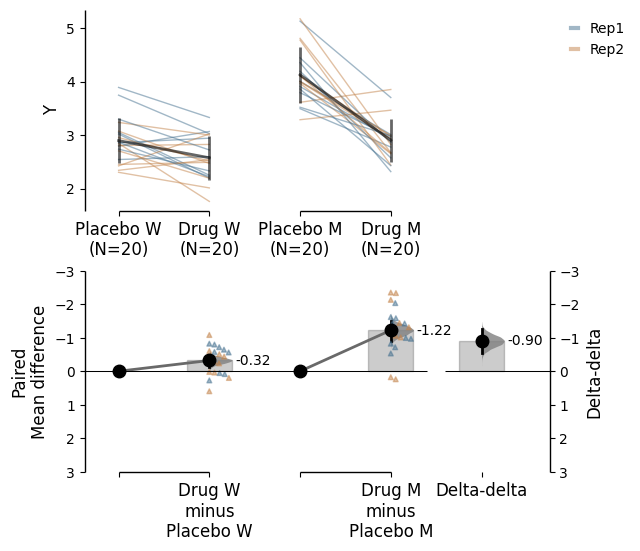

In [ ]:
paired_delta2.mean_diff.plot(contrast_ylim=(3, -3));

You can also change the y-limit of the delta-delta axes and the regular delta axes via the `delta2_ylim` parameter.

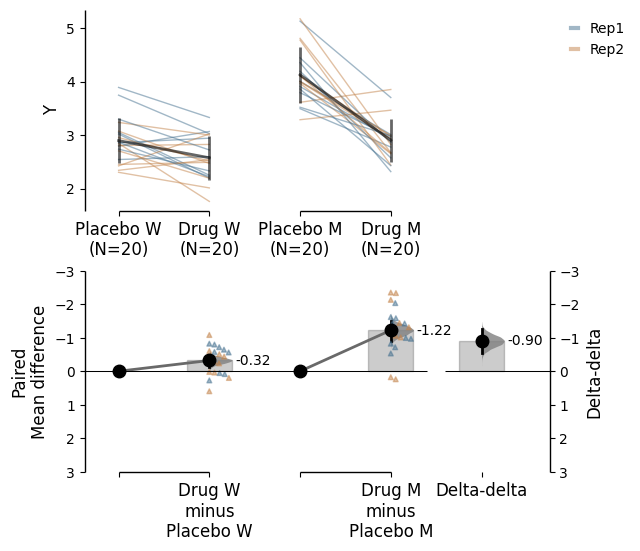

In [ ]:
paired_delta2.mean_diff.plot(delta2_ylim=(3, -3));

### Labels

- `raw_label` - label the raw data y-axis
- `contrast_label` - label the contrast y-axis

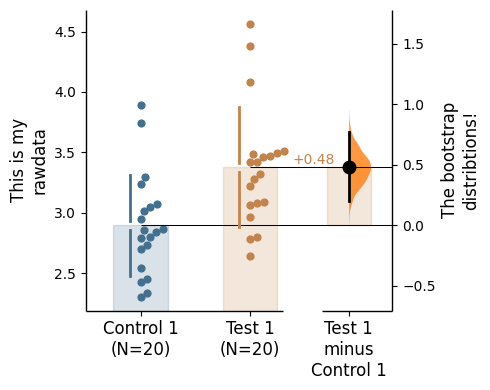

In [ ]:
two_groups_unpaired.mean_diff.plot(raw_label="This is my\nrawdata", 
                                   contrast_label="The bootstrap\ndistribtions!"
                                );

Unique for delta-delta:
- `delta2_ylim` - to label the delta-delta y-axis

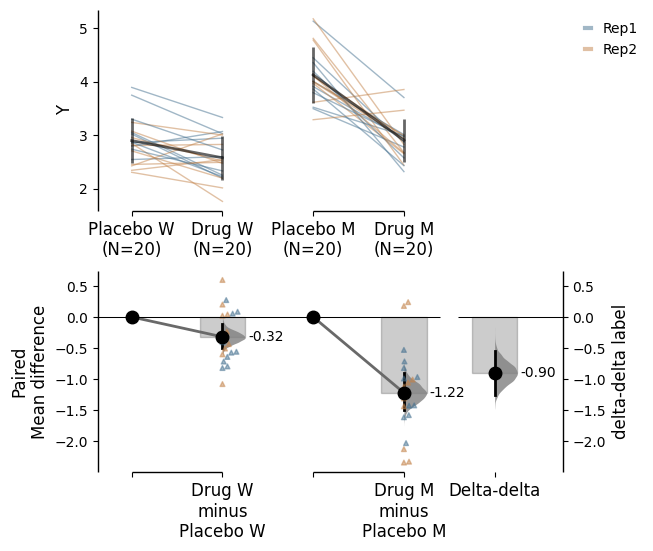

In [ ]:
paired_delta2.mean_diff.plot(delta2_label='delta-delta label');

### Axes ticks
You can add minor ticks and also change the tick frequency by accessing
the axes directly.

Each estimation plot produced by ``dabest`` has two axes. The first one
contains the rawdata swarmplot while the second one contains the bootstrap
effect size differences.


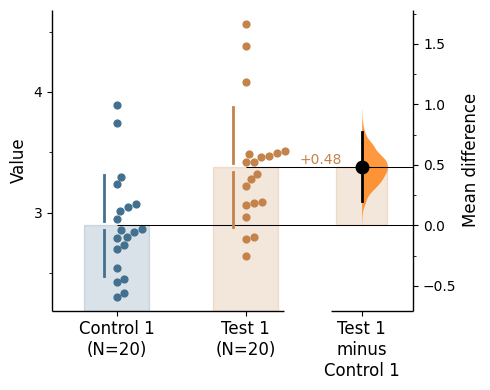

In [ ]:
import matplotlib.ticker as Ticker

f = two_groups_unpaired.mean_diff.plot()

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.yaxis.set_major_locator(Ticker.MultipleLocator(1))
rawswarm_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.5))

contrast_axes.yaxis.set_major_locator(Ticker.MultipleLocator(0.5))
contrast_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.25))

### Add counts to tick labels
By default, the tick labels include the sample size for each group. This can be switched off via
setting `show_sample_size=False` in the `.plot()` method. 

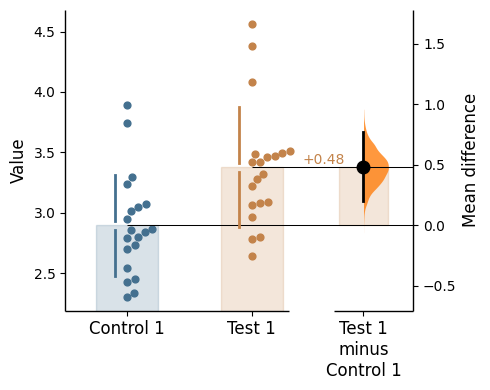

In [ ]:
two_groups_unpaired.mean_diff.plot(show_sample_size=False
                                );

## Changing swarm side
In `dabest`, swarmplots are, by default, plotted asymmetrically to the right side. You may change this by using the parameter `swarm_side`. 

There are only three valid values: `"right"` (default), `"left"`, `"center"`.

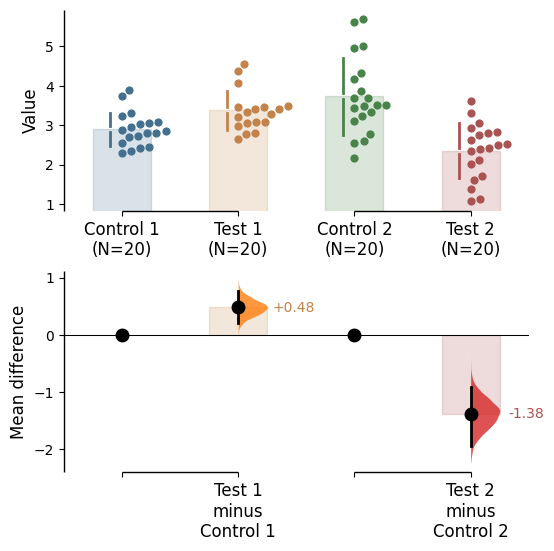

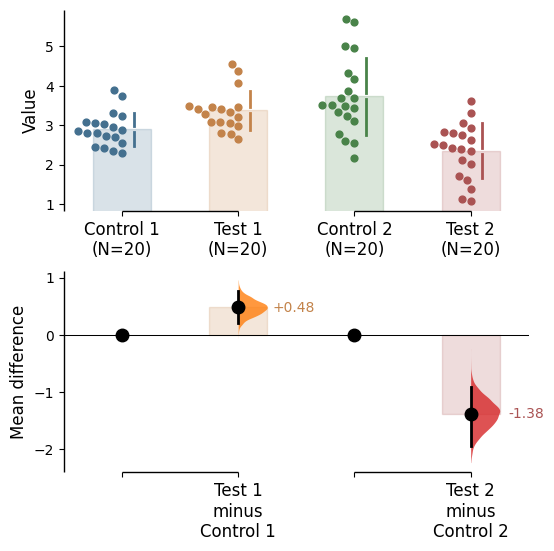

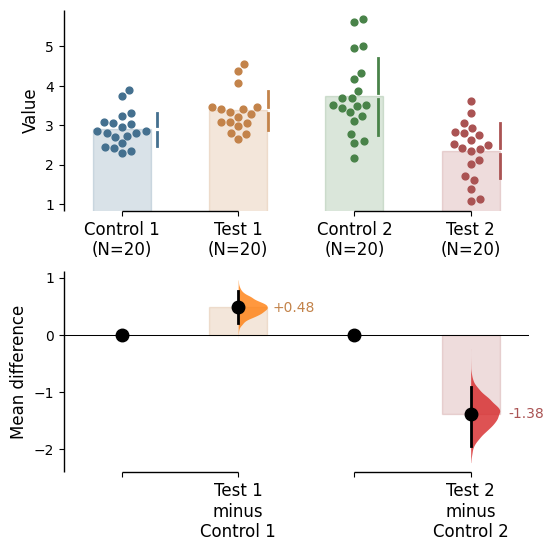

In [ ]:
multi_2group.mean_diff.plot(swarm_side="right");
multi_2group.mean_diff.plot(swarm_side="left");
multi_2group.mean_diff.plot(swarm_side="center");

## Creating estimation plots in existing axes

*Implemented in v0.2.6 by Adam Nekimken*.

``dabest.plot`` has an ``ax`` parameter that accepts Matplotlib
``Axes``. The entire estimation plot will be created in the specified
``Axes``.


In [ ]:
two_groups_paired_baseline = dabest.load(df, idx=("Control 1", "Test 1"),
                                  paired="baseline", id_col="ID")
multi_2group_paired = dabest.load(df,
                            idx=(("Control 1", "Test 1"),
                                 ("Control 2", "Test 2")),
                            paired="baseline", id_col="ID")

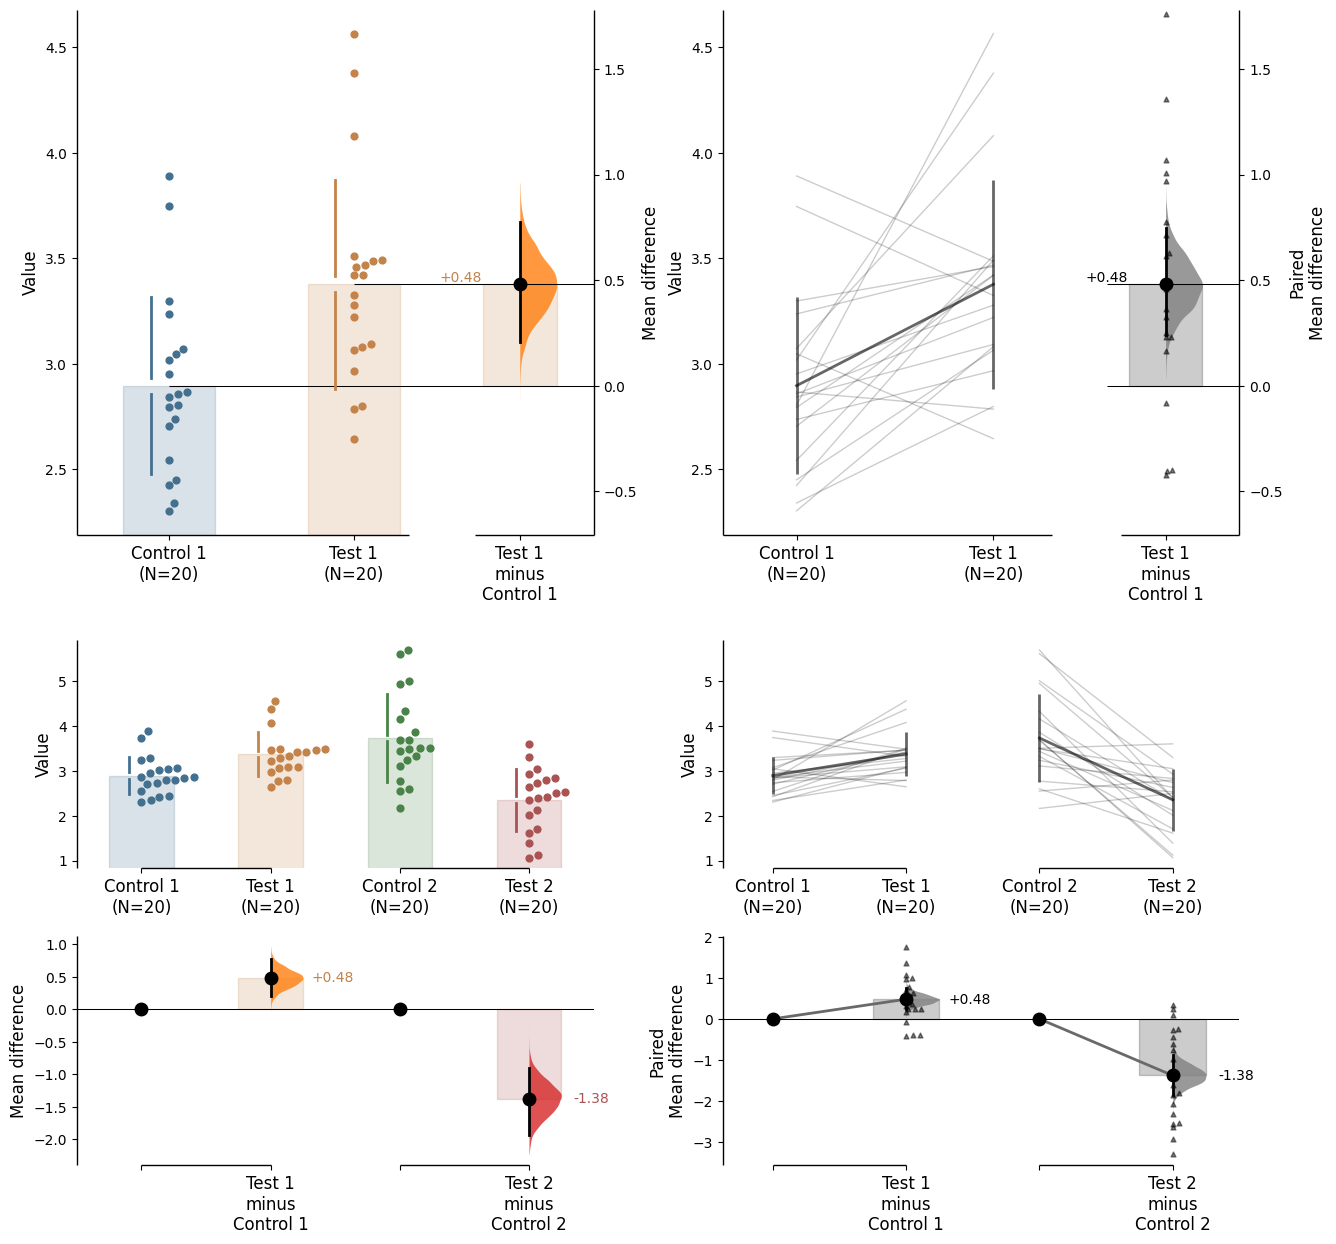

In [ ]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(nrows=2, ncols=2,
                      figsize=(15, 15),
                      gridspec_kw={'wspace': 0.25} # ensure proper width-wise spacing.
                     )

two_groups_unpaired.mean_diff.plot(ax=axx.flat[0]);

two_groups_paired_baseline.mean_diff.plot(ax=axx.flat[1]);

multi_2group.mean_diff.plot(ax=axx.flat[2]);

multi_2group_paired.mean_diff.plot(ax=axx.flat[3]);

In this case, to access the individual rawdata axes, use
``name_of_axes`` to manipulate the rawdata axes, and
``name_of_axes.contrast_axes`` to gain access to the effect size axes.

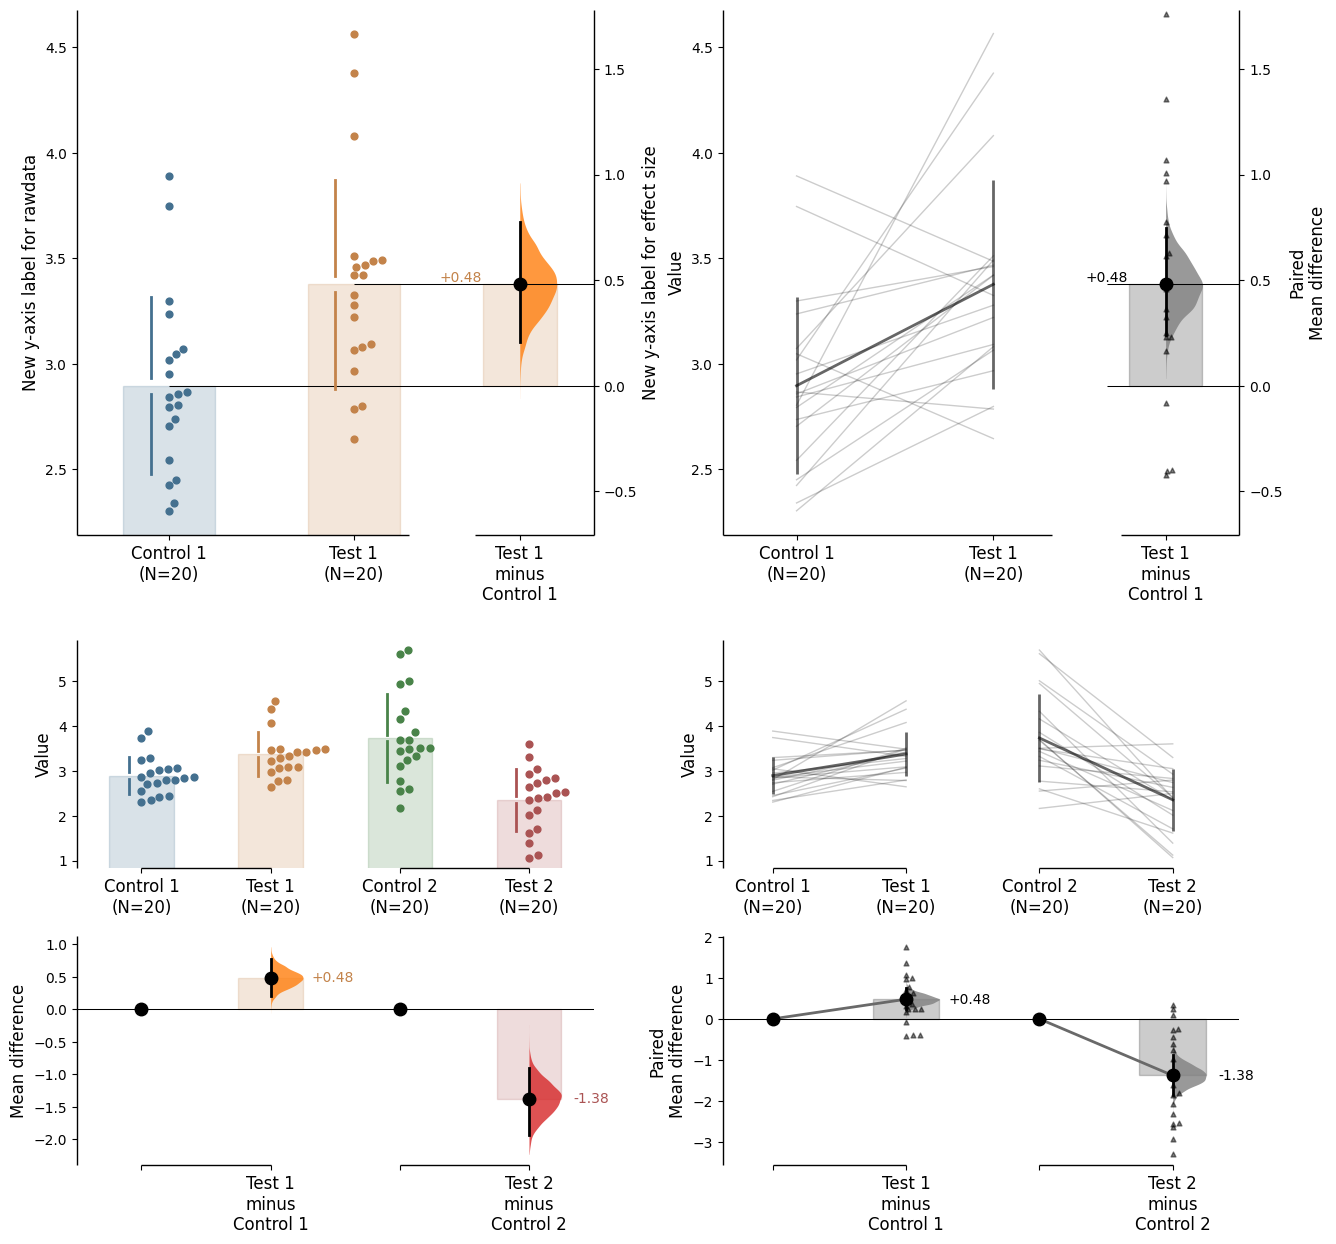

In [ ]:
topleft_axes = axx.flat[0]
topleft_axes.set_ylabel("New y-axis label for rawdata")
topleft_axes.contrast_axes.set_ylabel("New y-axis label for effect size")
f

## Legend
For plots with a `color_col` specified, a legend will be created. Utilise the `legend_kwargs` parameter to adjust the legend.

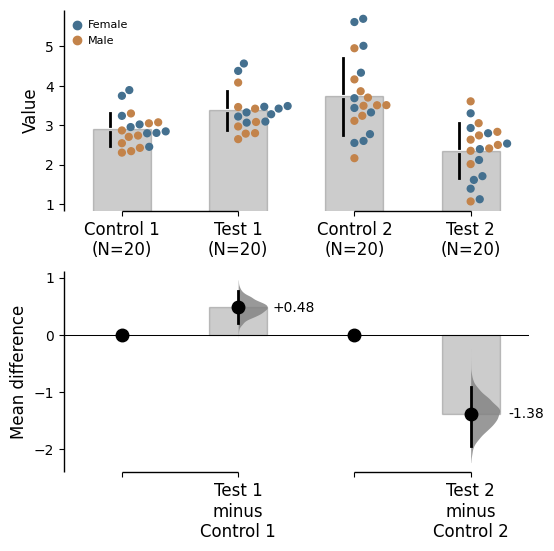

In [ ]:
multi_2group.mean_diff.plot(color_col="Gender", 
                            legend_kwargs={'bbox_to_anchor': [0, 1], 'fontsize':8});

## Hiding options 
For mini-meta plots, it is possible to hide the weighted average plot by setting the parameter ``show_mini_meta=False`` in the ``.plot()`` method.

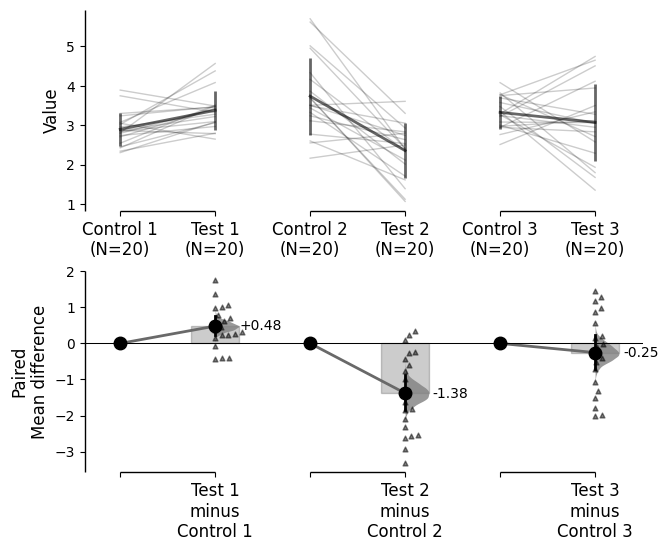

In [ ]:
mini_meta_paired.mean_diff.plot(show_mini_meta=False);

Similarly, you can hide the delta-delta effect size by setting 
``show_delta2=False`` in the ``.plot()`` method.

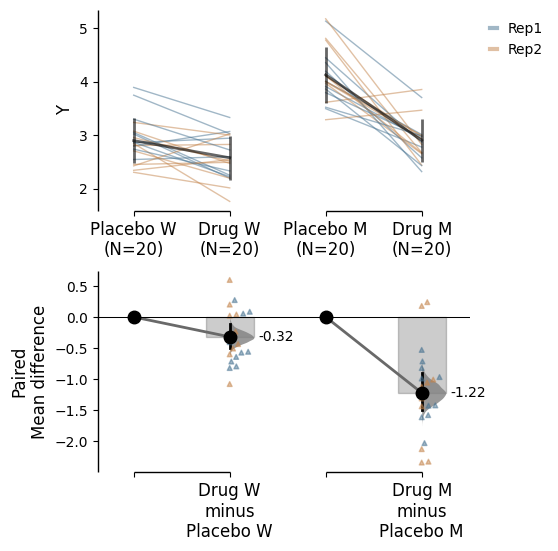

In [ ]:
paired_delta2.mean_diff.plot(show_delta2=False);

## Effect size error bar and marker

Modifying the effect size marker can be done via `contrast_marker_kwargs`. This parameter accepts a dictionary of keyword arguments.

The available options are:

- `'marker'` - type of the marker 
- `'markersize'` - size of the marker
- `'color'` - color of the marker 
- `'alpha'` - alpha of the marker (transparency)
- `'zorder'` - zorder of the marker (the layering relative to other plot elements)

**Note:
markersize can also be modified directly via the `contrast_marker_size` argument**

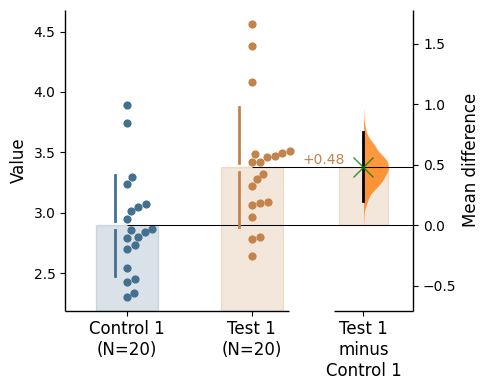

In [ ]:
two_groups_unpaired.mean_diff.plot(contrast_marker_kwargs={"marker": "x", 'markersize': 15, 'color': 'green', 'alpha':0.8, 'zorder': 5});

Modifying the appearance of the effect size error bar can be done via the `contrast_errorbar_kwargs` parameter. This parameter accepts a dictionary of keyword arguments.

The relevant inputs to `contrast_errorbar_kwargs` are:

- `'lw'` -  width of the error bar
- `'linestyle'` - line style of the error bar
- `'color'`  - color of the error bar 
- `'zorder'` - zorder of the error bar (the layering relative to other plot elements)
- `'alpha'` - alpha of the error bar (transparency)

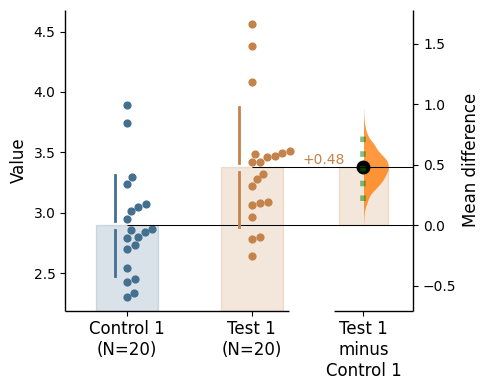

In [ ]:
two_groups_unpaired.mean_diff.plot(contrast_errorbar_kwargs={'lw': 4, 'color': 'green', 'alpha':0.5, 'zorder': 2, 'linestyle': ':'});

## Group summaries

Group summaries represent the summary statistics of the sample and are included by default. 

In swarmplots and proportion plots, these are represented by gapped lines.

In slopegraphs, these are represented by a solid line connecting the group mean/median with error bars.

The type of group summary can be specified via `group_summaries` in the `.plot()` method and must be one of these: `'median_quartiles'`, `'mean_sd'`, `None`.

By default, the group summary is set to `'mean_sd'`.

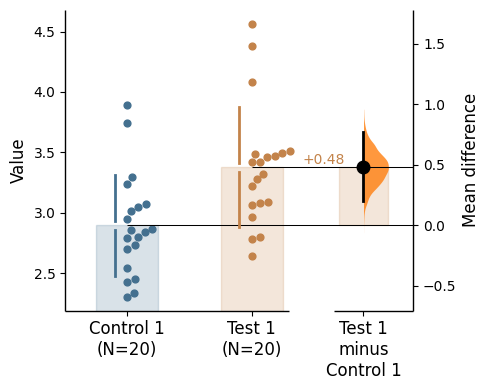

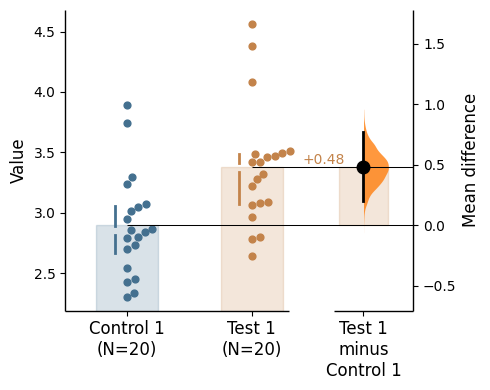

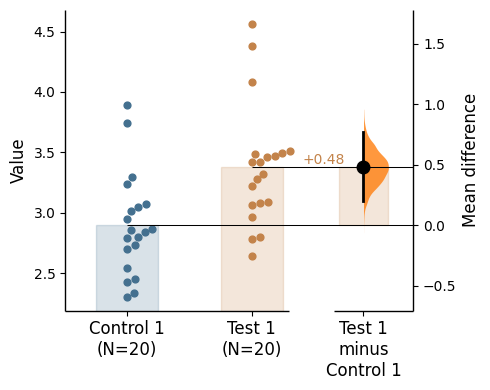

In [ ]:
two_groups_unpaired.mean_diff.plot(group_summaries="mean_sd");
two_groups_unpaired.mean_diff.plot(group_summaries="median_quartiles");
two_groups_unpaired.mean_diff.plot(group_summaries=None);

For slopegraphs, the group summary is represented by a solid line connecting the group mean/median with error bars.

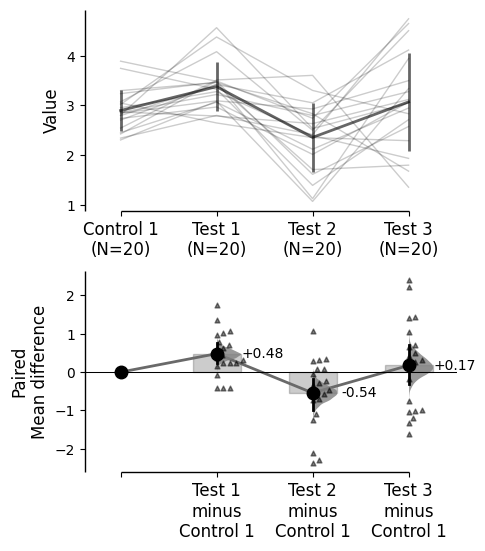

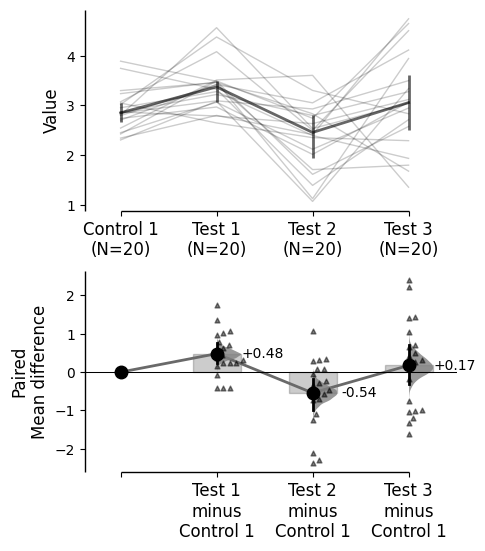

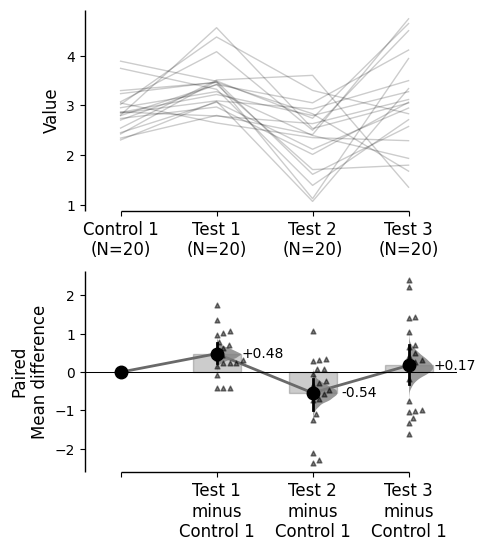

In [ ]:
repeated_measures.mean_diff.plot(group_summaries="mean_sd");
repeated_measures.mean_diff.plot(group_summaries="median_quartiles");
repeated_measures.mean_diff.plot(group_summaries=None);

**Group summaries** have an associated kwargs `group_summaries_kwargs`

The relevant inputs to `group_summaries_kwargs` are:

- `'zorder'` - zorder of the gapped lines (the layering relative to other plot elements)
- `'lw'` - linewidth of the gapped lines
- `'alpha'` - alpha of the gapped lines (transparency)
- `'gap_width_percent'` - gap size (for gapped lines only)
- `'offset'` - location adjustment of the gapped lines (x-axis; for gapped lines only)
- `'color'` - the shared color of the gapped lines

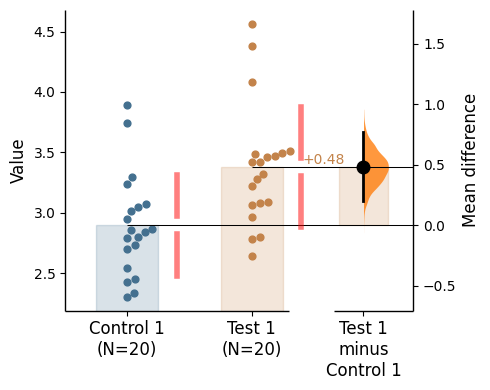

In [ ]:
two_groups_unpaired.mean_diff.plot(group_summaries_kwargs={'gap_width_percent': 3, 'alpha': 0.5, 'lw': 4, 'offset': 0.6, 'color':'red'});

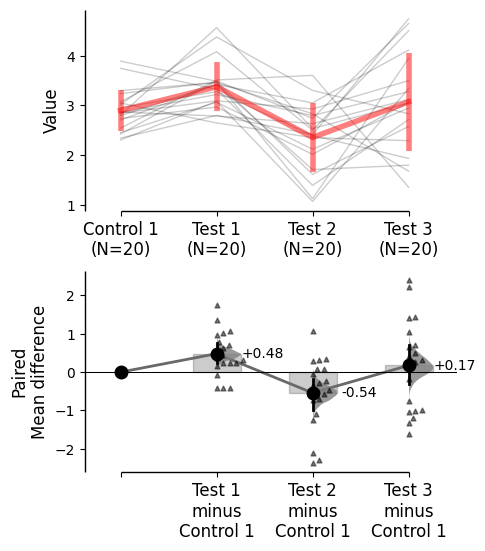

In [ ]:
repeated_measures.mean_diff.plot(group_summaries_kwargs={'gap_width_percent': 3, 'alpha': 0.5, 'lw': 4, 'offset': 0.6, 'color':'red'});

## Raw bars

**Raw bars** are included in swarmplots by default. It can be turned off by setting `raw_bars=False` in the `.plot()` method.

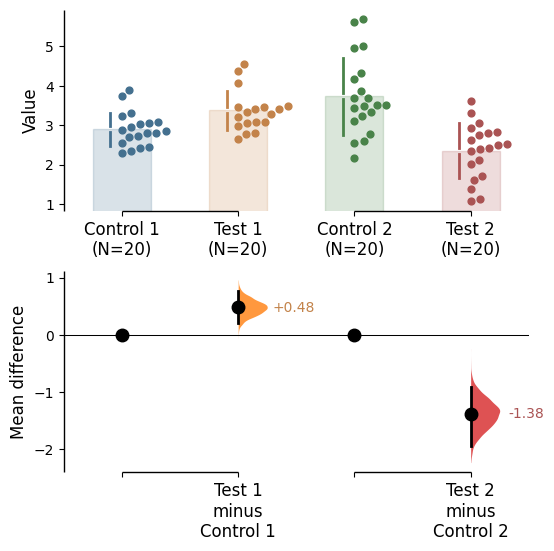

In [ ]:
multi_2group.mean_diff.plot(raw_bars=True, contrast_bars=False);

Raw bar kwargs can be utilised via `raw_bars_kwargs` in the `.plot()` method.

Pass any keyword arguments accepted by matplotlib.patches.Rectangle here, as a string.

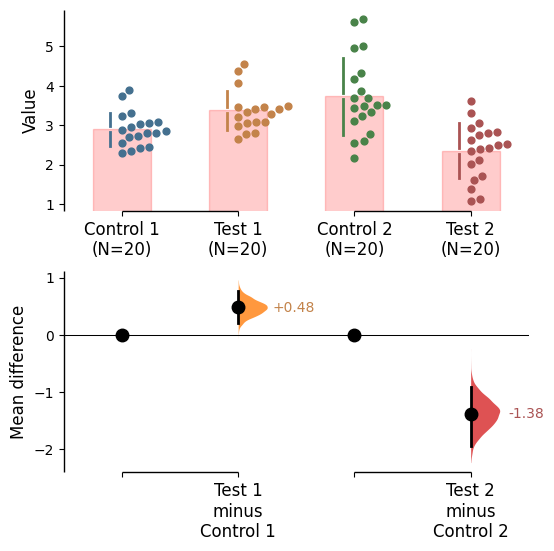

In [ ]:
multi_2group.mean_diff.plot(raw_bars=True, contrast_bars=False,
                            raw_bars_kwargs={'color': "red", 'alpha': 0.2}, 
                            );

## Contrast bars
**Contrast bars** are included in all plots by default. It can be turned off by setting `contrast_bars=False` in the `.plot()` method.

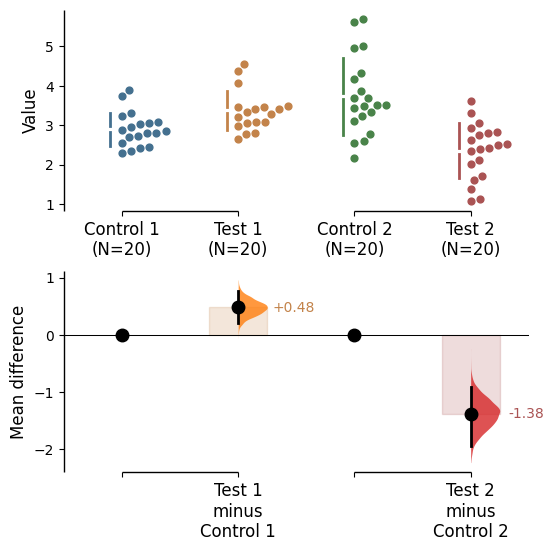

In [ ]:
multi_2group.mean_diff.plot(contrast_bars=True, raw_bars=False);

Contrast bar kwargs can be utilised via `contrast_bars_kwargs` in the `.plot()` method.

Pass any keyword arguments accepted by matplotlib.patches.Rectangle here, as a string.

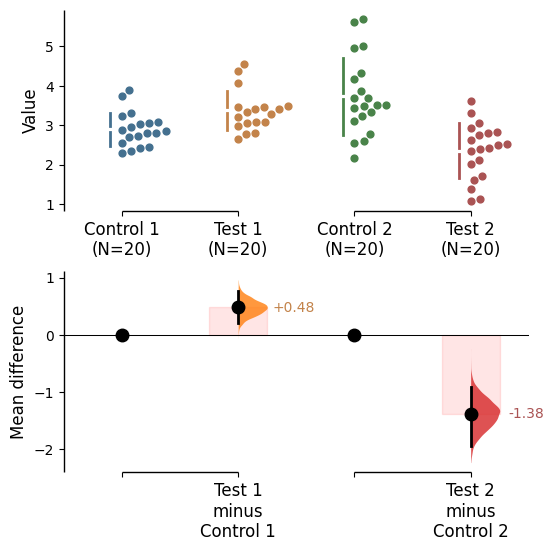

In [ ]:
multi_2group.mean_diff.plot(contrast_bars=True, raw_bars=False, 
                            contrast_bars_kwargs={'color': "red", 'alpha': 0.1}
                            );

## Reference band
A **reference band** can be added for each relevant contrast object as desired via supplying a list to the argument `reference_band` in the `.plot()` method.

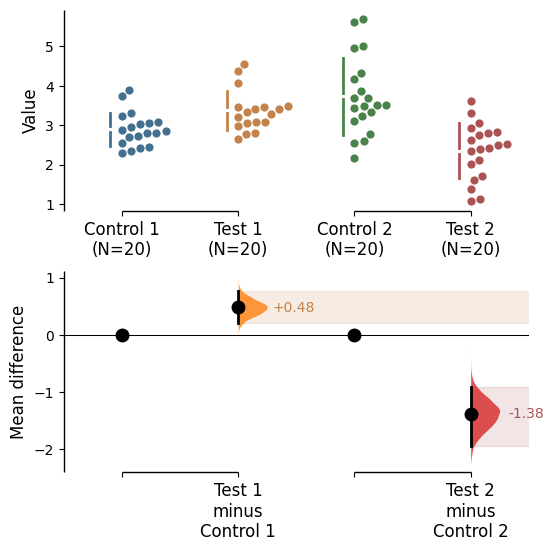

In [ ]:
multi_2group.mean_diff.plot(reference_band=[0, 1], contrast_bars=False, raw_bars=False);

Reference band kwargs can be utilised via `reference_band_kwargs` in the `.plot()` method.

The relevant inputs to `reference_band_kwargs` are:

- `'span_ax'` - Whether the reference band(s) should span the entire x-axis or start from the relevant effect size curve
- `'color'` - Color of the reference band(s). If color is not specified, the color of the effect size curve will be used.
- `'alpha'` - Alpha of the reference band(s) (transparency)
- `'zorder'` - Zorder of the reference band(s) (the layering relative to other plot elements)

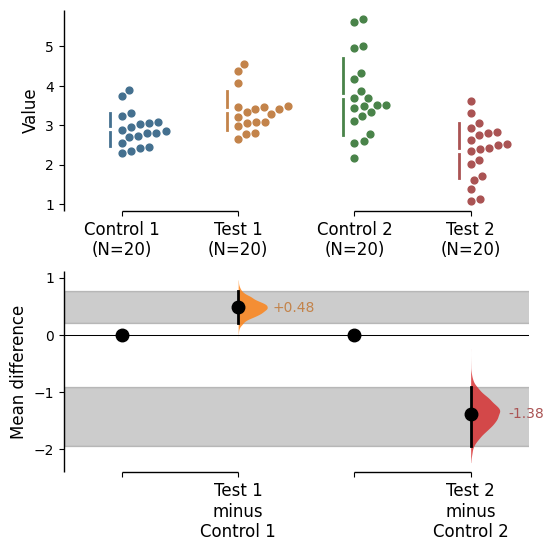

In [ ]:
multi_2group.mean_diff.plot(reference_band=[0,1], contrast_bars=False, raw_bars=False,
                            reference_band_kwargs={"alpha": 0.2, "color": 'black', 'span_ax': True}
                            );

## Delta text
**Delta text** is included in all plots by default. It can be turned off by setting `delta_text=False` in the `.plot()` method.

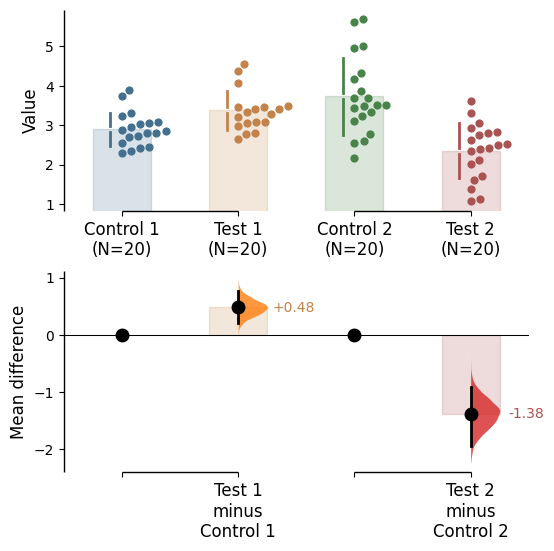

In [ ]:
multi_2group.mean_diff.plot(delta_text=True);

Delta text kwargs can be utilised via `delta_text_kwargs` in the `.plot()` method.

The relevant inputs to `delta_text_kwargs` are:

- `'color'` - Color. If color is not specified, the color of the effect size curve will be used. 
- `'alpha'`- Alpha (transparency)
- `'fontsize'` - Font size
- `'ha'` - Horizontal alignment
- `'va'` - Vertical alignment 
- `'rotation'` - Text rotation
- `'x_coordinates'` - Specify the x-coordinates of the text
- `'y_coordinates'` - Specify the y-coordinates of the text
- `'offset'` - Am x-axis coordinate adjuster for minor movement of all text

Otherwise, pass any keyword arguments accepted by matplotlib.text.Text, as a string. 

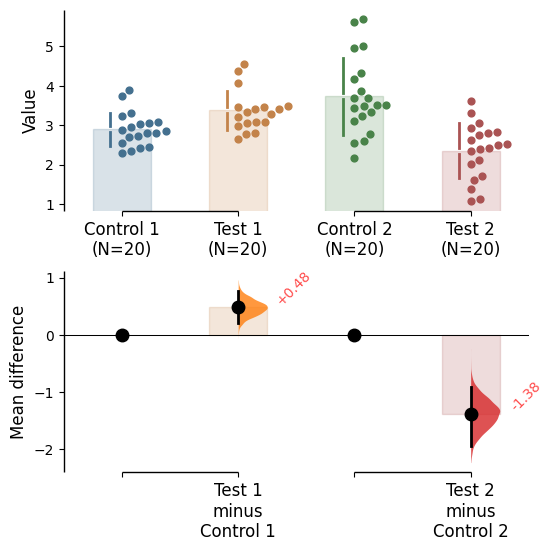

In [ ]:
multi_2group.mean_diff.plot(delta_text=True, 
                            delta_text_kwargs={"color":"red", "rotation":45, "va":"bottom", "alpha":0.7});

`'x_coordinates'` and/or `'y_coordinates'` if you would like to specify the text locations manually. 

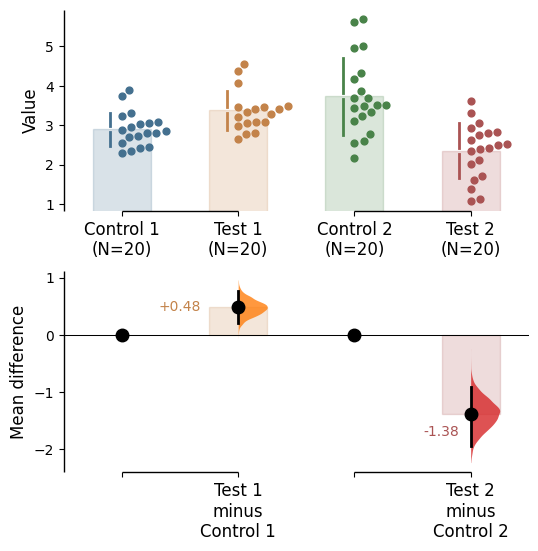

In [ ]:
multi_2group.mean_diff.plot(delta_text=True, 
                            delta_text_kwargs={"x_coordinates":(0.5, 2.75), 
                                               "y_coordinates":(0.5, -1.7)});

`'offset'` to adjust the x location of all the texts (positive moves right, negative left).

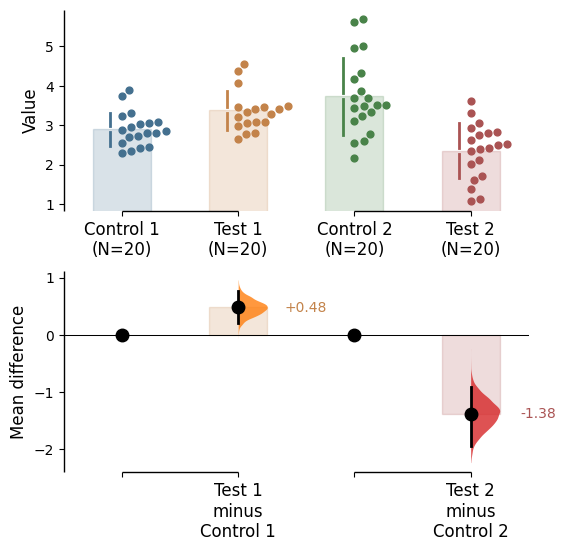

In [ ]:
multi_2group.mean_diff.plot(delta_text=True, 
                            delta_text_kwargs={"offset":0.1});

## Adding jitter to slopegraph plots

For paired plots, you can add jitter to the slopegraph by adding a value for `jitter` in the `slopegraph_kwargs` parameter.

This can be useful for specific paired plots when there are many overlapping points.

Currently, jitter is only available for slopegraphs and only in the x-direction (vertical plots) or y-direction (horizontal plots).

In [ ]:
# Jitter tests
np.random.seed(9999) # Fix the seed to ensure reproducibility of results.
Ns = 20 # The number of samples taken from each population
# Create samples
c1 = [0.5]*Ns + [1.5]*Ns
c2 = [2]*Ns + [1]*Ns
t1 = [1]*Ns + [2]*Ns
t2 = [1.5]*Ns + [2.5]*Ns
t3 = [2]*Ns + [1]*Ns
t4 = [1]*Ns + [2]*Ns
t5 = [1.5]*Ns + [2.5]*Ns
id_col = pd.Series(range(1, 2*Ns+1))
df_jittertest= pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                 'Control 2' : c2,     'Test 2' : t2, 'Test 3' : t3,
                    'Test 4'    : t4,     'Test 5' : t5, 'ID'  : id_col})

For the example below, there are many overlapping points for the paired plot, which makes it look like only one sample.

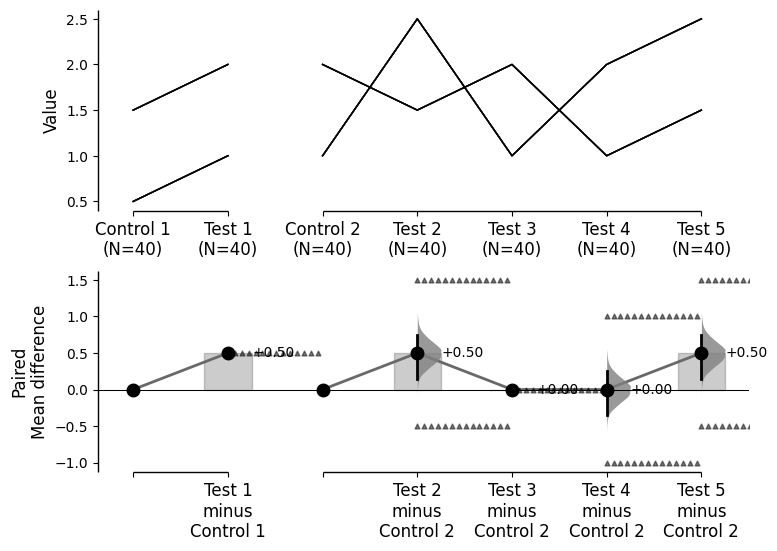

In [ ]:
multi_2group = dabest.load(df_jittertest, idx=(("Control 1", "Test 1"),("Control 2", "Test 2", "Test 3", "Test 4", "Test 5")), paired='baseline', id_col='ID')
multi_2group.mean_diff.plot(horizontal=False, group_summaries=None);

Adding jitter can help to visualize the data better.

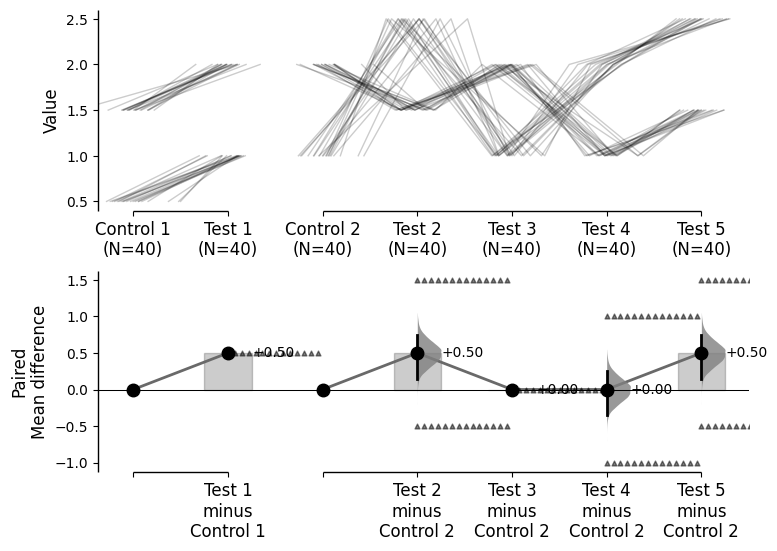

In [ ]:
multi_2group.mean_diff.plot(horizontal=False, slopegraph_kwargs={'jitter': 1}, group_summaries=None);

## Gridkey

You can utilise a gridkey table format for representing the index groupings. This can be reached via `gridkey` in the `.plot()` method. 

You can either use `gridkey='auto'` to automatically generate the gridkey, or pass a list of indexes to represent the groupings (e.g., `gridkey=['Control', 'Test']`).

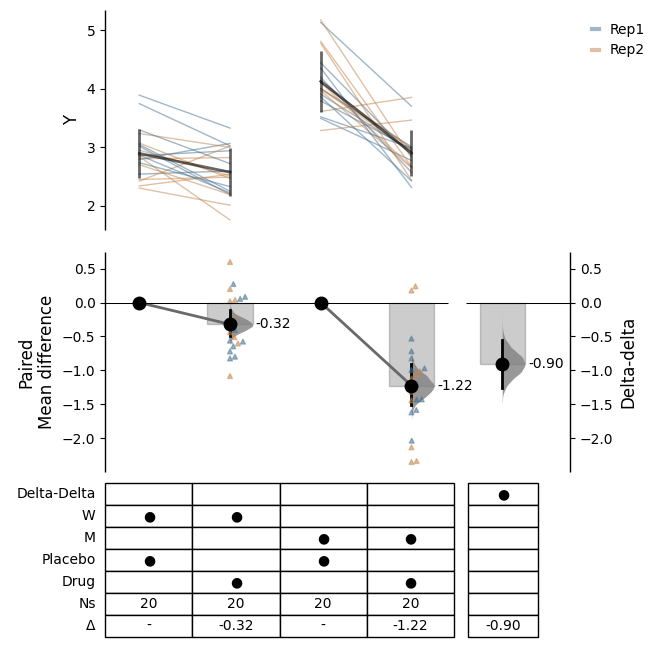

In [ ]:
paired_delta2.mean_diff.plot(gridkey='auto');

Gridkey kwargs can be utilised via `gridkey_kwargs` in the `.plot()` method.

The relevant inputs to `gridkey_kwargs` are:

- `'show_es'` - Whether to show the effect size in the gridkey
- `'show_Ns'` - Whether to show the sample sizes in the gridkey
- `'merge_pairs'` - Whether to merge the pairs in the gridkey (paired data only)
- `'delimiters'` - Delimiters to use for the autoparser. E.g., [';', '>', '_']
- `'marker'` - Marker to use for filling the gridkey
- `'fontsize'` - Font size of the gridkey text
- `'labels_fontsize'` - Font size of the labels in the gridkey

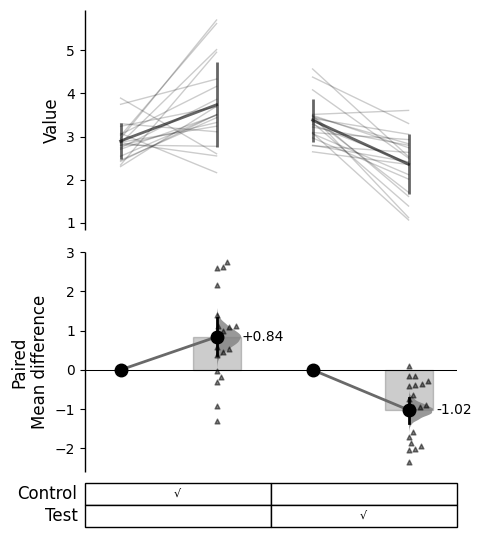

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Control 2"), ("Test 1", "Test 2")),paired='baseline', id_col='ID')
multi_2group.mean_diff.plot(gridkey=['Control', 'Test'], 
                            gridkey_kwargs={'merge_pairs': True, 'show_es': False, 'show_Ns': False, 'marker': '√',
                                            'fontsize': 8, 'labels_fontsize': 12});

## Delta dot

By default, delta dots are included in paired experiment plots (excluding proportion plots). 

This feature can be turned off by setting `delta_dot=False` in the `.plot()` method.

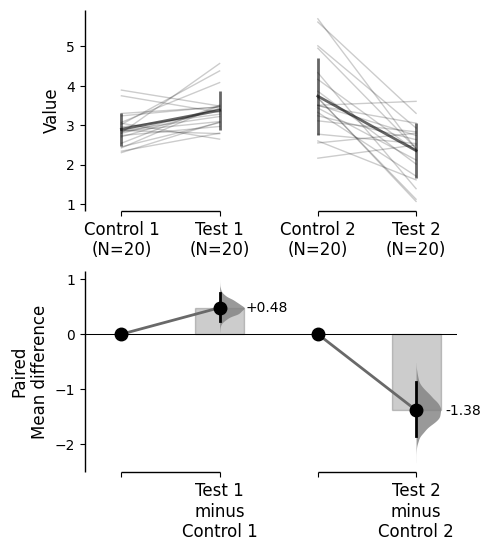

In [ ]:
multi_2group_paired.mean_diff.plot(delta_dot=False);

Delta dot kwargs can be utilised via `delta_dot_kwargs` in the `.plot()` method.

The relevant inputs to `delta_dot_kwargs` are:

- `'color'` - Specify the color of the delta dots. If color is not specified, the color of the effect size curve will be used.
- `'marker'` - Marker of the dots. The default are triangles ('^')
- `'alpha'` - Alpha (Transparency)
- `'zorder'` - Zorder (the layering relative to other plot elements)
- `'size'` - Marker size
- `'side'` - Which side to plot the delta dots. The options are `'left'`, `'right'`, or `'center'`. This functions like the `swarm_side` parameter.

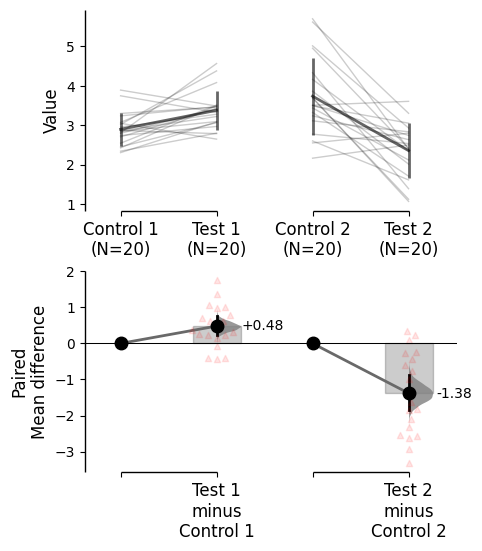

In [ ]:
multi_2group_paired.mean_diff.plot(delta_dot_kwargs={"color":'red', "alpha":0.1, 'zorder': 2, 'size': 5, 'side': 'center'});

## Effect size paired lines

By default, effect size paired lines are included in paired experiment plots (excluding proportion plots). 

This feature can be turned off by setting `contrast_paired_lines=False` in the `.plot()` method.

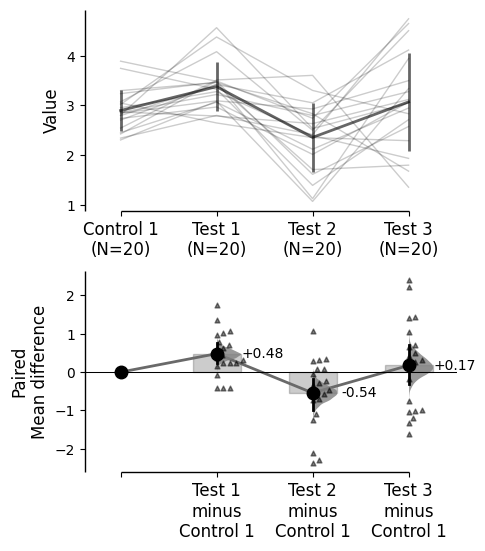

In [ ]:
repeated_measures.mean_diff.plot(contrast_paired_lines=True);

Effect size line kwargs can be utilised via `contrast_paired_lines_kwargs` in the `.plot()` method.

By default, the following keywords are passed:

- `'linestyle'` - Linestyle
- `'linewidth'` - Linewidth
- `'zorder'` - Zorder (the layering relative to other plot elements)
- `'color'` - Color. Default is 'dimgray'
- `'alpha'` - Alpha (transparency)

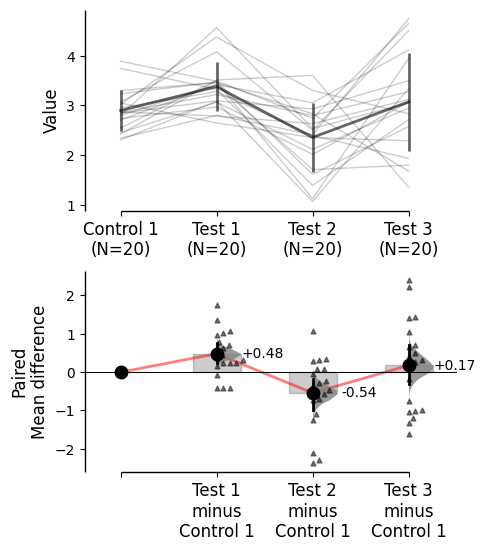

In [ ]:
repeated_measures.mean_diff.plot(contrast_paired_lines=True, 
                                 contrast_paired_lines_kwargs={"color": "red", "alpha": 0.5, "linestyle": "-"});   

## Baseline error curve

In DABEST **v2025.03.27**, we introduce a new aspect to the contrast axes: the baseline dot and error curve. 
While the baseline dot is always present, the error curve can be turned on by setting `show_baseline_ec=True` in the `.plot()` method.

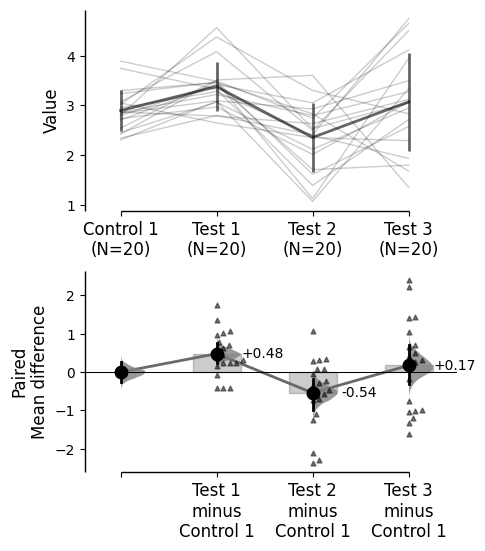

In [ ]:
repeated_measures.mean_diff.plot(show_baseline_ec=True);   